## Gaussian Examples workbook
This is the .ipynb file associated with the Medium and Towards Data Science article: 'Properties of the Normal Distribution'. 
By Justin Olson


In [1]:
%matplotlib inline
%pylab inline

# Load packages
import matplotlib
import numpy as np
#import random
import matplotlib.pyplot as plt
import plotnine as p9
import random as rd
import pandas as pd
import seaborn as sns
import statistics

Populating the interactive namespace from numpy and matplotlib


# Plot for Figure 1: normal distribution with mean 0 & standard deviation 1.

Generate Data

In [2]:
# set seed ###keep it 100###
np.random.seed(100)

# select 1,000,000 randomly generated values from a normal distribution with mean 0, sd 1
x = np.random.normal(loc = 0, scale = 1, size = 1000000)

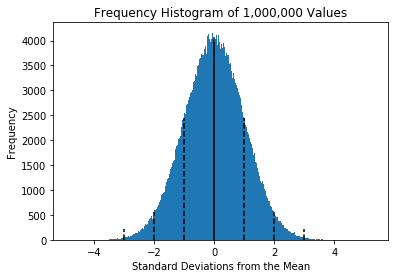

In [3]:
# plot histogram on x, disperse across 1,000 bins
plt.hist(x, bins = 1000)
plt.gca().set(title='Frequency Histogram of 1,000,000 Values', xlabel = 'Standard Deviations from the Mean', ylabel='Frequency')

# mean line
plt.axvline(x=x.mean(), ymin = 0, ymax = 0.93, color='k', label = 'mean')

# plus/minus one standard deviation
plt.axvline(x= x.std(), ymin = 0, ymax = 0.56, color='k', linestyle = '--', label = '"-1 st. dev."')
plt.axvline(x=-x.std(), ymin = 0, ymax = 0.56, color='k', linestyle = '--', label = "-1 st. dev.")

# plus/minus 2 standard deviations 
plt.axvline(x= -2 *x.std(), ymin = 0, ymax = 0.13, color='k', linestyle = '--', label = "-2 st. dev.")
plt.axvline(x= 2 *x.std(), ymin = 0, ymax = 0.13, color='k', linestyle = '--', label = "2 st. dev.")

# plus/minus 3 standard deviations 
plt.axvline(x= -3 *x.std(), ymin = 0, ymax = 0.05, color='k', linestyle = '--', label = "-3 st. dev.")
plt.axvline(x= 3 *x.std(), ymin = 0, ymax = 0.05, color='k', linestyle = '--', label = "3 st. dev.")

# let's see the magic
plt.show()

Calculate the number of randomly-generated values that fall within a given range of standard deviation(s). 

In [4]:
## calculate percentage of values within: 

#1 standard deviation
x_1sd = x[(x <= 1) & (x >= -1)]
prop_1sd = x_1sd.size/x.size * 100
prop_1sd # 68.2%

# 2 standard deviations
x_2sd = x[(x <= 2) & (x >= -2)]
prop_2sd = x_2sd.size/x.size * 100
prop_2sd # 95.5%

# 3 standard deviations
x_3sd = x[(x <= 3) & (x >= -3)]
prop_3sd = x_3sd.size/x.size * 100
prop_3sd # 99.7

# Print distribution of values by SD range
print('Breakdown of Value Frequency Across Standard Deviations:',
    '\n{}% of values fall within 1 Standard Deviation'.format(round(prop_1sd, 1)), 
      '\n{}% of values fall within 2 Standard Deviations'.format(round(prop_2sd, 1)), 
     '\n{}% of values fall within 3 Standard Deviations'.format(round(prop_3sd, 1)))

Breakdown of Value Frequency Across Standard Deviations: 
68.3% of values fall within 1 Standard Deviation 
95.5% of values fall within 2 Standard Deviations 
99.7% of values fall within 3 Standard Deviations


# Central Limit Theorem Experiment 
If one conducts an experiment and plot the mean, then repeat that process until we have a distribution of means, what does the distribution of means look like?

In [5]:
# Conduct an experiment, gathering the values of 30 data points
# assume our data are from a population with a mean of zero and standard deviation of one. 
example_experiment = np.random.random(size=30)

# Get the mean result of our example
example_experiment.mean()

# Prepare to conduct 100 experiments. Create an empty list to house the results.
experiments  = range(0,100)
results = []

# For each experiment, determine the mean of the 30 data points and add it to the results. 
for experiment in experiments:
    results.append((np.random.random(size = 30).mean()))
    
print(results[0:6])

[0.5989887399313989, 0.43658226714912984, 0.516197207237269, 0.5644085681269274, 0.515371774911666, 0.4756218313931588]


Text(0.5, 0.95, '30 observations')

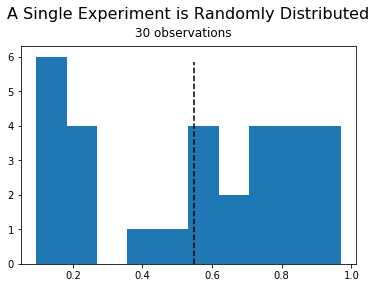

In [6]:
# plot the results of a single experiment (n = 30)
plt.hist(example_experiment)

# add line indicating the mean from a single experiment
plt.axvline(x=example_experiment.mean(), ymin = 0, ymax = 0.93, color='k', linestyle = 'dashed')

# title
plt.title(f'A Single Experiment is Randomly Distributed', y=1.10, fontsize=16)
plt.suptitle('30 observations', fontsize=12, y = 0.95)

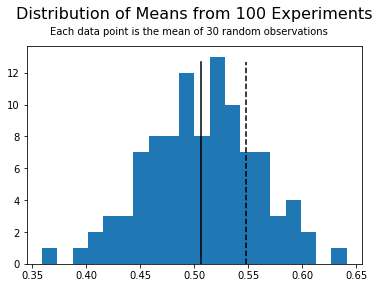

In [7]:
# Plot the distribution of experiments
plt.hist(results, bins = 20)
#plt.gca().set(title= f'Distribution of Means from {len(results)} Experiments', ylabel='Frequency')

plt.title(f'Distribution of Means from {len(results)} Experiments', y=1.10, fontsize=16)
plt.suptitle('Each data point is the mean of 30 random observations', fontsize=10, y = 0.95)

# add line indicating the mean from a single experiment
plt.axvline(x=example_experiment.mean(), ymin = 0, ymax = 0.93, color='k', linestyle = 'dashed')

# add line indicating the mean of the means
plt.axvline(x= mean(results), ymin = 0, ymax = 0.93, color='k')

# Processes that add random variations converge to normal

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Heights (cm)'),
 Text(0.5, 1.0, 'The Distribution of Values used for Perturbation is Random')]

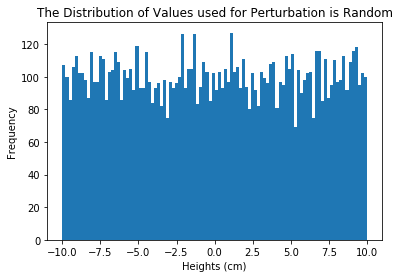

In [8]:
# we are using perturbation values that are random (not normally distributed)

tenk_random = np.random.uniform(-10, 10, 10000)

plt.hist(tenk_random, bins = 100)
plt.gca().set(title='The Distribution of Values used for Perturbation is Random', xlabel = 'Heights (cm)', ylabel='Frequency')

In [9]:
# Generate 10 random (not normally distributed) numbers to perturb baseline height of 200
# Perturbations between -20 and 20 (inclusive).
height_example = np.random.uniform(-20, 20, 10).round(2)

# Print array of perturbations
print("Example height perturbations:", height_example)

# Print total height
print("Total height with additive height perturbations", round((height_example.sum() + 200), 2))

Example height perturbations: [ 15.43  -9.32 -15.65   7.36   3.73  -9.67  -9.71 -14.4    0.26   1.29]
Total height with additive height perturbations 169.32


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Heights (cm)'),
 Text(0.5, 1.0, 'Height Distribution with Additive Perturbations')]

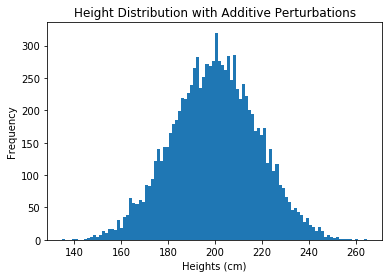

In [10]:
## Now we will replicate the above 10,000 times so that we can see what a distribution of heights will look like: 

# Create empty list to hold the heights
heights = []

# Conduct the following loop 10,000 times:
for _ in range(10000):
    # the baseline height is 200 cm
    baseline_height = 200
    # randomly sample 10 values between -10 & 10 (inclusive)
    height_perturbations = np.random.uniform(-10, 10, 10)
    # total = baseline + perturbations
    total_height = baseline_height + height_perturbations.sum() 
    # add new height to list of heights
    heights.append(total_height.round(2)) 

# Plot image
plt.hist(heights, bins = 100)
plt.gca().set(title='Height Distribution with Additive Perturbations', xlabel = 'Heights (cm)', ylabel='Frequency')

# Small multiplicative effects approximate the normal curve

In [11]:
# Generate 10 random (not normally distributed) numbers to perturb baseline height of 200
# Magnitude of multiplicative effects is between 0.9 and 1.1 (inclusive)

# single min/max variations
print("Min and Max effects of ten small multiplicative perturbation:")
print("Min", round(200 * 0.95**10, 2))
print("Max", round(200 * 1.05**10, 2))
print(round(200 * 1.05**10, 2)- round(200 * 0.95**10, 2))
height_example = np.random.uniform(0.95, 1.05, 10)

# Print array of perturbations
print("Example array of height perturbations (small multiplicative):", height_example)

# Print total height
print("Total height with multiplicative height variations", round((height_example.prod() * 200), 2))

Min and Max effects of ten small multiplicative perturbation:
Min 119.75
Max 325.78
206.02999999999997
Example array of height perturbations (small multiplicative): [0.95379401 1.01346585 0.97603793 1.03311098 0.96681985 0.99713886
 1.02007242 0.97377551 1.03635162 1.03858263]
Total height with multiplicative height variations 200.93


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Heights (cm)'),
 Text(0.5, 1.0, 'Height Distribution with Small Multiplicative Variation')]

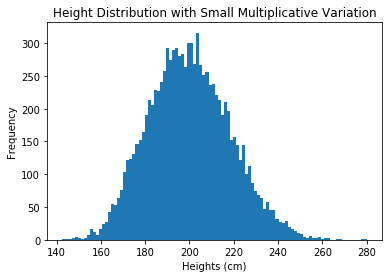

In [12]:
## Now we will replicate the above 10,000 times so that we can see what a distribution of heights will look like: 

# Create empty list to hold the heights
heights = []

# Conduct the following loop 10,000 times:
for _ in range(10000):
    baseline_height = 200
    height_perturbations = np.random.uniform(0.95, 1.05, 10) 
    total_height = baseline_height * height_perturbations.prod()
    heights.append(total_height)

plt.hist(heights, bins = 100)
plt.gca().set(title='Height Distribution with Small Multiplicative Variation', xlabel = 'Heights (cm)', ylabel='Frequency')

# Large multiplicative effects that are log-transformed converge to normal

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Height (cm)'),
 Text(0.5, 1.0, 'Height Distribution with Large Multiplicative Variation')]

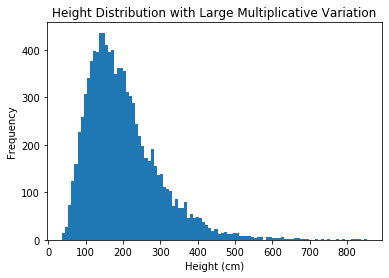

In [13]:
## Now we will replicate the above 10,000 times so that we can see what a distribution of heights will look like: 

# Create empty list to hold the heights
heights = []

# Conduct the following loop 10,000 times:
for _ in range(10000):
    baseline_height = 200 
    height_perturbations = np.random.uniform(0.75, 1.25, 10) 
    total_height = baseline_height * height_perturbations.prod()
    heights.append(total_height)

plt.hist(heights, bins = 100)
plt.gca().set(title='Height Distribution with Large Multiplicative Variation', xlabel = 'Height (cm)', ylabel='Frequency')

In [14]:
print(200 * 0.95**10)

print(200 * 1.05**10)


119.74738784767574
325.7789253554884


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Log(Height) (cm)'),
 Text(0.5, 1.0, 'Log of Height Distribution with Large Multiplicative Variation')]

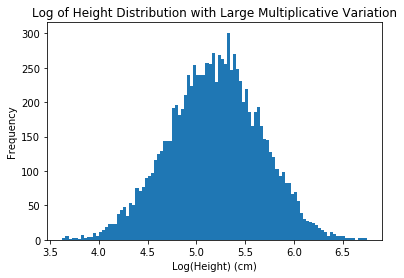

In [15]:
# Log of Multiplicative Effect
plt.hist(log(heights), bins = 100)
plt.gca().set(title='Log of Height Distribution with Large Multiplicative Variation', xlabel = 'Log(Height) (cm)', ylabel='Frequency')

# Probability Density Histogram of Male Space Alien Heights

A Probability Density Histogram of Male Space Alien Heights generated. This data is generaged from a normal distribution with a mean of 177.8 cm and standard deviation of 12.7 cm. 

Text(0.5, 1.0, 'Population of Male Space Alien Heights (n = 10,000)')

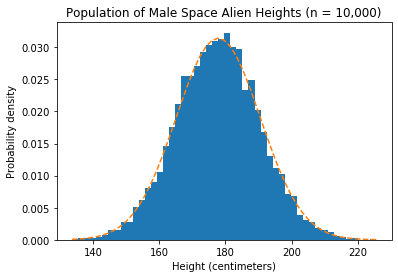

In [16]:
# sample 10,000 heights 
men_height = np.random.normal(loc= 177.8, scale = 12.7, size=10000)

# plot the population of 10,000 hieghts
en_height = np.random.normal(loc= 177.8, scale = 12.7, size=10000)
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(men_height, num_bins, density=1)

# add a 'best fit' line
mu = 177.8
sigma = 12.7
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

# Set x-axis label, y-axis label, and title. 
ax.set_xlabel('Height (centimeters)')
ax.set_ylabel('Probability density')
ax.set_title(r'Population of Male Space Alien Heights (n = 10,000)')

# Select_n_plot function

Select_n_plot() is a function that takes a set of population data, randomly samples the data, and displays
the resulting sample distributions via histograms. This function and figure has been inspired by the work of Douglas G Altman and J Martin Bland, titled 'Statistical notes: The normal distribution'.

D. G. Altman, J. M. Bland, Statistics notes: The normal distribution. BMJ. 310, 298 (1995).
URL: https://www.bmj.com/content/310/6975/298.short

In [17]:
# define select_n_plot; a function to view randomly drawn samples
def select_n_plot(data, sample_n, n,  n2 = None, n3 = None, n4 = None, n5 = None):
    # set plot rows to the length of n's specified 
    '''
    Select_n_plot() is a function that takes a set of population data, randomly samples the data, and displays
        the resulting sample distributions via histograms.
        
        This function makes data sampling accessible, and easily enables the user to understand how normally distributed samples
        may not possess a normal distribution themselves, especially at smaller sample sizes. 
        
        Each row displays sample sizes according to the designated sample size value and up to 5 rows may be created (one for each n).
        The length of plots displayed in each row will be equal to the value specified by the 'sample_n' parameter. 
    
    Select_n_plot takes the following inputs:
        
        data: the population data that will be sampled from. Data should be float or integer.  
        
        sample_n: the number of times that sampling of 'n' will be repeated. The number of histograms that will be created for
                each sample size. 
        
        n: the number of samples to be drawn from the population data. The user may speficy up to 5 values to be drawn (n, n2, n3, n4, n5). 
            At least one n value must be specified. If additional n values remain empty, they will default to 'None'.
        
    
    *This function was inspired by the desire to create an easily-reproducible 'figure 3' as found here: 
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2548695/pdf/bmj00578-0032.pdf   
    '''
    
    n_index = [n, n2, n3, n4, n5]
    plot_rows = len(n_index) - n_index.count(None)
    plot_rows
    
    fig, ax = plt.subplots( nrows = plot_rows, ncols = sample_n, sharey = False, sharex = True, squeeze = False)
    fig.suptitle('Samples Selected from a Normally Distributed Population')
    
    subplots_adjust(left=None, bottom=-0.4, right=None, top=None, wspace=0.4, hspace=0.4)

    for n_index, n_item in enumerate(n_index):  
            if n_item != None: 
                for i in range(sample_n):
                        x = np.random.choice(data, n_item)
                        x = pd.Series(x)
                        subtitle = ("n = %i" % n_item)
                        #legend = ("n = %i" % n)
                        ax[n_index, i].set_title(subtitle)
                        ax[n_index, i].hist(x)
                        
plt.savefig('sample_data_heights.png', bbox_inches = 'tight') 

<Figure size 432x288 with 0 Axes>

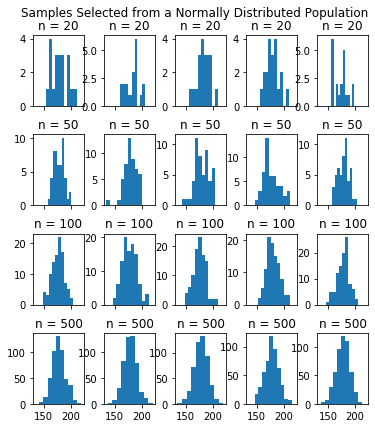

In [18]:
# Execute select_n_plot function
x = select_n_plot(data = men_height,sample_n = 5, n = 20, n2 = 50, n3 = 100, n4 = 500) 